# ChemTrace problem
The answer to questions 1-4 is in this file and the codes are followed after the answer of each question 

## Question 1: Mathematical Optimization model

- Decision Variables: x1, x2 (the amount of allocated fund to two strategies)

x1: allocated fund to improving efficiency
x2: allocated fund to reducing activity
- Objective: max(20000 * x1 + 15000 * x2)
- Constraints: 
              1500 * x1 + 800 *x 2 >= 10000   NOx saving 
              50 * x1 + 120 * x2 >= 750        CH4 saving
              x1 >= 0 
              x2>= 0
              x1 + x2 <= 10
              
* In matrix notation: 
                      max C.Tx
                      subject to Ax >= b
                      x>=0
                      sum(x)<= 10
C= \begin{bmatrix} 20000 \\ 15000 \end{bmatrix}
x= \begin{bmatrix}x1\\x2\end{bmatrix} 

A=  \begin{bmatrix} 1500 & 800 \\ 50 & 120\end{bmatrix}
b= \begin{bmatrix}10000\\750\end{bmatrix}
   


## Question 2: Solve the model using Pulp
### Funds allocated to each strategy:

* budjet_for_Improving_efficiency = 6.4285714
* budjet_for_Reducing_activity = 3.5714286

### Saved amount of Co2: 
* 182142.857


In [425]:
# Import PuLP modeler functions
from pulp import *

In [97]:
# create the model to contain the problem data, specifiy max function in terms of saving CO2
model = LpProblem(name="ChemTrace", sense=LpMaximize )



In [3]:
# put data in lists/dictionaries
startegies = ['Improving_efficiency','Reducing_activity']
saving_CO2  = {'Improving_efficiency': 20000, 'Reducing_activity':15000}
NOx_saving = {'Improving_efficiency': 1500, 'Reducing_activity':800}
CH4_saving = {'Improving_efficiency': 50, 'Reducing_activity':120}


In [4]:
# Creates a dictionary of LP variables
x = LpVariable.dicts( name="budjet_for", indices=startegies, lowBound=0, upBound=None)

In [6]:
# The objective function is added to 'model' first; 
model += lpSum(saving_CO2[i]*x[i] for i in startegies), "Total CO2 saving"



In [7]:
# The constraints are added
model += lpSum(NOx_saving[i]*x[i] for i in startegies) >= 10000
model += lpSum(CH4_saving[i]*x[i] for i in startegies) >= 750
model += lpSum(x[i] for i in startegies)<=10



In [8]:
# The model data is written to an .lp file
model.writeLP("ChemTrace.lp")

[budjet_for_Improving_efficiency, budjet_for_Reducing_activity]

In [9]:
# solve
model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/kheirysohouli/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/1x/_847lj390sv7mv459sy0j1y80000gn/T/16a42b2ec2cc450cac96221c0c08e6d9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/1x/_847lj390sv7mv459sy0j1y80000gn/T/16a42b2ec2cc450cac96221c0c08e6d9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-3) rows, 0 (-2) columns and 0 (-6) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 182142.86
After Postsolve, objective 182142.86, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 182142.8571 - 0 iterations time 0.002, Presolve 0.00
Option for prin

1

In [10]:
# The status of the solution is printed to the screen                    
print( "Status: " + LpStatus[model.status] )

Status: Optimal


In [11]:
# The optimised objective function value is printed to the screen
print( "Total saving_CO2 = " +str( value(model.objective) ) )

Total saving_CO2 = 182142.857


In [12]:
# Each of the variables is printed with it's resolved optimum value
for v in model.variables():
    print( v.name + " = " + str(v.varValue) )

budjet_for_Improving_efficiency = 6.4285714
budjet_for_Reducing_activity = 3.5714286


## Question 3: Visualizing Feasible Region, Decision variables, Constraints, Optimal Solution
- Feasible Region is depicted as a grey area in the following plot
- Decision Variables are x1 and x2 which are the axes of the plot
- Three constraints are depicted with the colors of red, green and blue
- Optimal solusion in the bold green point 

In [ ]:
budjet_for_Improving_efficiency = 6.4285714
budjet_for_Reducing_activity = 3.5714286

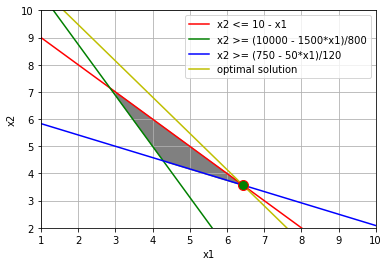

In [539]:
import matplotlib.pyplot as plt
import numpy as np

# Decision Variables
#x1= budjet_for_Improving_efficiency
#x2= budjet_for_Reducing_activity

# Define the values for x1
x1 = np.linspace(0, 15, 100)

# Define constarints equations (subject to):
y1 = 10 - x1
y2 = (10000 - 1500*x1)/800
y3 = (750 - 50*x1)/120

# Define optimal sulution
y4 =(182142.857 -(20000 * x1))/15000

# Plot the inequalities
plt.plot(x1, y1, '-r', label='x2 <= 10 - x1')
plt.plot(x1, y2, '-g', label='x2 >= (10000 - 1500*x1)/800')
plt.plot(x1, y3, '-b', label='x2 >= (750 - 50*x1)/120')
plt.plot(x1, y4, '-y', label='optimal solution')

plt.xlim([1, 10])
plt.ylim([2, 10])

# Fill the area between the inequalities
plt.fill_between(x1,y1, np.maximum(y2,y3), where=(y1>=y2)&(y1>=y3) , interpolate=True, color='gray')

# grey area is feasible area
# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')

# Inserting Optimoum point on the graph
x1 = [6.4285714]
x2 = [3.5714286]
plt.grid()
plt.plot(x1, x2, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")

plt.show()



## Question 4: Three situations


In [243]:
import pandas as pd
df_strategies = pd.read_excel('/Users/kheirysohouli/Downloads/Strategies.xlsx')

In [244]:
df_strategies

,Pollutant,Insulation A,Insulation B,Insulation C,EV Polestar 2,EV Renault Zoe,Replace valves,Leak detection,OHProfiler,Low Burner,Ultra Low Burner,Fuel/air mixing,ESP design,ESP design (MV variant),Donate A,Donate B,Donate C
0,NOx,350,0,1300,0,0,1600,50,230,1400,1700,1050,800,0,660,500,0
1,CH4,130,1833,50,0,0,225,2500,180,0,0,450,450,1770,100,0,0
2,CO2,1600,2050,400,430,460,250,0,550,250,50,0,950,1840,1050,1500,2000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Category:,Insulation,Insulation,Insulation,EV,EV,Valves,Leak,Profiler,Burner,Burner,Mixing,ESP,ESP,Donation,Donation,Donation


## Situation A)

* mathematical description or the change to the new model:

number of strategies increased to 16 in stead of 2. Therefor, the dimension of the x matrix increased to 16*1



- Decision Variables: x1 to x16 (the amount of allocated fund to each strategy)

- Objective: max C.Tx

- Constraints: 
              subject to Ax >= b
                      x>=0
                      sum(x)<=10
              
where: 

C is a matrix of size 16*1 contains the amount of CO2 save in each strategy 

x is a matrix in the size of 16*1 

A is a matrix with the size of 2*16

b is a matrix with the size of 2*1
   


* allocated fund to each strategy in the optimum solution:

budjet_for_Donate_B = 5.4545455

budjet_for_Replace_valves = 4.5454545

there is no contribution to the other strategies


* Saved CO2:
9318.181875

* whay it is more/less/equal compared to previous situations:

It is much less than the previous problem. the amount of CO2 saving in the strategies in this problem is less than the previous one while the constraints on the other two plutants is constant. Generally, the strategies are completely different from the previous plroblem. in current problem, there are 16 strategies rather than 2 in previus problem, as well as much less CO2-saving per each strategies. 

In [321]:
# create the model to contain the problem data
model_a = LpProblem(name="ChemTrace", sense=LpMaximize )


In [194]:
arr = strategies.to_numpy()[0:2,1:]
arr

array([[350, 0, 1300, 0, 0, 1600, 50, 230, 1400, 1700, 1050, 800, 0, 660,
        500, 0],
       [130, 1833, 50, 0, 0, 225, 2500, 180, 0, 0, 450, 450, 1770, 100,
        0, 0]], dtype=object)

In [322]:
# create list/dict of objective variables 

strategies = list(df_strategies.columns)[1:] 
CO2 = dict(zip(strategies,list(df_strategies.loc[2][1:])))
NOx = dict(zip(strategies,list(df_strategies.loc[0][1:])))
CH4 = dict(zip(strategies,list(df_strategies.loc[1][1:])))
#strategies.to_numpy()[0:2,1:]


In [323]:
# Creates a dictionary of LP variables

x = LpVariable.dicts( name="budjet_for", indices=strategies, lowBound=0, upBound=None)


16

In [324]:
# The objective function is added to 'model' first; calculate the sum of a list of linear expressions
model_a += lpSum(CO2[i]*x[i] for i in strategies) # "Total CO2 saving"


In [331]:
# The constraints are added
model_a += lpSum(NOx[i]*x[i] for i in strategies) >= 10000
model_a += lpSum(CH4[i]*x[i] for i in strategies) >= 750
model_a += lpSum(x[i] for i in strategies)<=10



In [332]:
# The model data is written to an .lp file
model_a.writeLP("ChemTrace_a.lp")

[budjet_for_Donate_A,
 budjet_for_Donate_B,
 budjet_for_Donate_C,
 budjet_for_ESP_design,
 budjet_for_ESP_design_(MV_variant),
 budjet_for_EV_Polestar_2,
 budjet_for_EV_Renault_Zoe,
 budjet_for_Fuel_air_mixing,
 budjet_for_Insulation_A,
 budjet_for_Insulation_B,
 budjet_for_Insulation_C,
 budjet_for_Leak_detection,
 budjet_for_Low_Burner,
 budjet_for_OHProfiler,
 budjet_for_Replace_valves,
 budjet_for_Ultra_Low_Burner]

In [333]:
# solve
model_a.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/kheirysohouli/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/1x/_847lj390sv7mv459sy0j1y80000gn/T/f0d5f0f79ec54c0386a311a39ceae82d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/1x/_847lj390sv7mv459sy0j1y80000gn/T/f0d5f0f79ec54c0386a311a39ceae82d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 100 RHS
At line 107 BOUNDS
At line 108 ENDATA
Problem MODEL has 6 rows, 16 columns and 74 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (-3) rows, 14 (-2) columns and 35 (-39) elements
0  Obj -0 Primal inf 16.18235 (3) Dual inf 88317.637 (12)
3  Obj 9318.1818
Optimal - objective value 9318.1818
After Postsolve, objective 9318.1818, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 9318.181818 - 3 iterations time 0

1

In [334]:
# The status of the solution is printed to the screen                    
print( "Status: " + LpStatus[model_a.status] )

Status: Optimal


In [335]:
# Total saving CO2
# The optimised objective function value is printed to the screen
print( "Total saving_CO2 = " +str( value(model_a.objective) ) )

Total saving_CO2 = 9318.181875


In [336]:
# Each of the variables is printed with it's resolved optimum value
for v in model_a.variables():
    print( v.name + " = " + str(v.varValue) ) # allocated budject for each strategy

budjet_for_Donate_A = 0.0
budjet_for_Donate_B = 5.4545455
budjet_for_Donate_C = 0.0
budjet_for_ESP_design = 0.0
budjet_for_ESP_design_(MV_variant) = 0.0
budjet_for_EV_Polestar_2 = 0.0
budjet_for_EV_Renault_Zoe = 0.0
budjet_for_Fuel_air_mixing = 0.0
budjet_for_Insulation_A = 0.0
budjet_for_Insulation_B = 0.0
budjet_for_Insulation_C = 0.0
budjet_for_Leak_detection = 0.0
budjet_for_Low_Burner = 0.0
budjet_for_OHProfiler = 0.0
budjet_for_Replace_valves = 4.5454545
budjet_for_Ultra_Low_Burner = 0.0


## Situation B

* mathematical description or the change to the new model:

number of strategies remained as to 16


- Decision Variables: x1 to x16 (the amount of allocated fund to each strategy)

- Objective: max C.Tx

- Constraints: there are changes in constraints
              subject to Ax >= b
                      x>=0
                      sum(x)<=10
                    abs(x['Insulation A']- 2.5) + abs(x['Replace valves'] - 0.75) <=1
where: 

C is a matrix of size 16*1 contains the amount of CO2 save in each strategy 

x is a matrix in the size of 16*1 

A is a matrix with the size of 2*16

b is a matrix with the size of 2*1
   


* allocated fund to each strategy in the optimum solution:

budjet_for_Donate_B = 2.8508479

budjet_for_Insulation_A = 2.5

budjet_for_Insulation_B = 0.017048554

budjet_for_Replace_valves = 1.75

budjet_for_Ultra_Low_Burner = 2.8821036

there is no contribution to the other strategies



* Saved CO2:

8892.826565700001

* whay it is more/less/equal compared to previous situations:

it is less than the previous problem. because several constraints equations are added which contributes to CO2-saving less than others. In this problem the strategy 'Insulation A' must get budjet while in the previous problem we saw the allocated budjet for that equal to zero for maximizing CO2-saving. on the other hand, a constraint on the allocating budjet for Replace_valves decreased to the maximum amount of 1.75, while in previous problem the allocated budjet for that was more than twice of this. Generally, subjecting the problem to conditions which cause decrease in the favorit strategy(related to CO2-saving) and increase in other strategies (related to CO2-saving) leads to less CO2-saving.


In [621]:
# create the model to contain the problem data, specifiy max function in terms of saving CO2
model_b = LpProblem(name="ChemTrace", sense=LpMaximize )

In [622]:
# create list/dict of objective variables 

strategies = list(df_strategies.columns)[1:] 
CO2 = dict(zip(strategies,list(df_strategies.loc[2][1:])))
NOx = dict(zip(strategies,list(df_strategies.loc[0][1:])))
CH4 = dict(zip(strategies,list(df_strategies.loc[1][1:])))

In [623]:
# Creates a dictionary of LP variables

x = LpVariable.dicts( name="budjet_for", indices=strategies, lowBound=0, upBound=None)
len(x )

16

In [624]:
model_b += lpSum(CO2[i]*x[i] for i in strategies)

In [625]:
# The constraints are added
model_b += lpSum(NOx[i]*x[i] for i in strategies) >= 10000
model_b += lpSum(CH4[i]*x[i] for i in strategies) >= 750
model_b += lpSum(x[i] for i in strategies)<=10
#model_b += lpSum(x[i] for i in ('Insulation A','Replace valves' ))<=4.25
#model_b += lpSum(x[i] for i in ('Insulation A','Replace valves' ))>=2.25
#model_b += lpSum(x['Insulation A'] ) <=3.5
#model_b += lpSum(x['Insulation A']) >=1.5
#model_b += lpSum(x['Replace valves'] ) <=1.75
model_b += (x['Insulation A']- 2.5) + (x['Replace valves'] - 0.75) <=1
model_b += -(x['Insulation A']- 2.5) + (x['Replace valves'] - 0.75) <=1
model_b += (x['Insulation A']- 2.5) - (x['Replace valves'] - 0.75) <=1
model_b += -(x['Insulation A']- 2.5) - (x['Replace valves'] - 0.75) <=1



In [626]:
# The model data is written to an .lp file
model_b.writeLP("ChemTrace_b.lp")

[budjet_for_Donate_A,
 budjet_for_Donate_B,
 budjet_for_Donate_C,
 budjet_for_ESP_design,
 budjet_for_ESP_design_(MV_variant),
 budjet_for_EV_Polestar_2,
 budjet_for_EV_Renault_Zoe,
 budjet_for_Fuel_air_mixing,
 budjet_for_Insulation_A,
 budjet_for_Insulation_B,
 budjet_for_Insulation_C,
 budjet_for_Leak_detection,
 budjet_for_Low_Burner,
 budjet_for_OHProfiler,
 budjet_for_Replace_valves,
 budjet_for_Ultra_Low_Burner]

In [627]:
# solve
model_b.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/kheirysohouli/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/1x/_847lj390sv7mv459sy0j1y80000gn/T/8724f3dd422b41818f83d2dbcaa3cd60-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/1x/_847lj390sv7mv459sy0j1y80000gn/T/8724f3dd422b41818f83d2dbcaa3cd60-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 72 RHS
At line 80 BOUNDS
At line 81 ENDATA
Problem MODEL has 7 rows, 16 columns and 45 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 7 (0) rows, 14 (-2) columns and 43 (-2) elements
0  Obj 1039.9999 Primal inf 17.064725 (5) Dual inf 88317.637 (12)
7  Obj 8892.8265
Optimal - objective value 8892.8265
After Postsolve, objective 8892.8265, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 8892.826537 - 7 iterations tim

1

In [628]:
# The status of the solution is printed to the screen                    
print( "Status: " + LpStatus[model_b.status] )

Status: Optimal


In [629]:
# Total saving CO2
# The optimised objective function value is printed to the screen
print( "Total saving_CO2 = " +str( value(model_b.objective) ) )

Total saving_CO2 = 8892.826565700001


In [630]:
# Each of the variables is printed with it's resolved optimum value
for v in model_b.variables():
    print( v.name + " = " + str(v.varValue) ) # allocated budject for each strategy

budjet_for_Donate_A = 0.0
budjet_for_Donate_B = 2.8508479
budjet_for_Donate_C = 0.0
budjet_for_ESP_design = 0.0
budjet_for_ESP_design_(MV_variant) = 0.0
budjet_for_EV_Polestar_2 = 0.0
budjet_for_EV_Renault_Zoe = 0.0
budjet_for_Fuel_air_mixing = 0.0
budjet_for_Insulation_A = 2.5
budjet_for_Insulation_B = 0.017048554
budjet_for_Insulation_C = 0.0
budjet_for_Leak_detection = 0.0
budjet_for_Low_Burner = 0.0
budjet_for_OHProfiler = 0.0
budjet_for_Replace_valves = 1.75
budjet_for_Ultra_Low_Burner = 2.8821036


## Situation C

* mathematical description or the change to the new model:
We need to add two constrains:

1-the alocated fund to the strategies is not continous any more and it is integer.
by using cat=LpInteger, this condition applied. So the allocated funds are integer in this situation. and the problem converted to the Integer problem.  

2- from each category not more than one strategy could recieve fund. I created another variable "y", and set cat = LpBinary. Also apply constraint to select not more than one strategy from one category by using codes bellow :

M = 999999

for i in strategies:

    model_c += x[i]<= M * y[i]
    
for category in categories:

    model_c += lpSum(y[cat] for cat in categories[category]) <=1



- Decision Variables: x1 to x16 (the amount of allocated fund to each strategy)

- Objective: max C.Tx

- Constraints: there are changes in constraints
              subject to Ax >= b
                      x>=0
                      sum(x)<=10
                    abs(x['Insulation A']- 2.5) + abs(x['Replace valves'] - 0.75) <=1
                    
where: 

C is a matrix of size 16*1 contains the amount of CO2 save in each strategy 

x is a matrix in the size of 16*1 

A is a matrix with the size of 2*16

b is a matrix with the size of 2*1
   


* allocated fund to each strategy in the optimum solution:


Donate_B = 2.0

ESP_design = 2.0

Insulation_A = 2.0

Replace_valves = 1.0

Ultra_Low_Burner = 3.0

there is no contribution to the other strategies

* Saved CO2:
8500.0

* whay it is less compared to situation B:

first adding the constraints of only integer funds are applicable.
second, adding constraint of not more than one strategy from one category leads to less CO2-saving, for example in situation C compared to situation B, no fund assign to Insulation_b which has significant effect on CO2-saving. 


In [730]:
# create the model to contain the problem data
model_c = LpProblem(name="ChemTrace", sense=LpMaximize )

In [731]:
# create list/dict of objective variables 

# Create a list of categories and their associated strategies
categories = {
    "Insulation": ["Insulation A", "Insulation B","Insulation C"],
    "EV": ["EV Polestar 2", "EV Renault Zoe"],
    "Valves": ["Replace valves"],
    "Leak": ["Leak detection"], 
    "Profiler" : ["OHProfiler"], 
    "Burner" : ["Low Burner", "Ultra Low Burner"],
    "Mixing" : ["Fuel/air mixing"],
    "ESP" : ["ESP design","ESP design (MV variant)" ],
    "Donation" : ["Donate A", "Donate B", "Donate C"]}

strategies = list(df_strategies.columns)[1:] 



x = {}
for category in categories:
    for strategy in categories[category]:
        x[strategy] = pulp.LpVariable(strategy, cat=LpInteger, lowBound=0, upBound=None )
        
y = {}
for category in categories:
    for strategy in categories[category]:
        y[strategy] = pulp.LpVariable('bin_'+strategy, cat = LpBinary)
        
#for strategy in y:
#    y[strategy] = strategy+"_y"


    
CO2 = dict(zip(strategies,list(df_strategies.loc[2][1:])))
NOx = dict(zip(strategies,list(df_strategies.loc[0][1:])))
CH4 = dict(zip(strategies,list(df_strategies.loc[1][1:])))

In [732]:
#specifiy max function in terms of saving CO2
model_c += lpSum(CO2[i]*x[i] for i in strategies)

In [733]:
# The constraints are added
model_c += lpSum(NOx[i]*x[i] for i in strategies) >= 10000
model_c += lpSum(CH4[i]*x[i] for i in strategies) >= 750
model_c += lpSum(x[i] for i in strategies)<=10
model_c += (x['Insulation A']- 2.5) + (x['Replace valves'] - 0.75) <=1
model_c += -(x['Insulation A']- 2.5) + (x['Replace valves'] - 0.75) <=1
model_c += (x['Insulation A']- 2.5) - (x['Replace valves'] - 0.75) <=1
model_c += -(x['Insulation A']- 2.5) - (x['Replace valves'] - 0.75) <=1



M = 999999

for i in strategies:
    model_c += x[i]<= M * y[i]
    
for category in categories:
    model_c += lpSum(y[cat] for cat in categories[category]) <=1

In [734]:
# The model data is written to an .lp file
model_c.writeLP("ChemTrace_c.lp")

[Donate_A,
 Donate_B,
 Donate_C,
 ESP_design,
 ESP_design_(MV_variant),
 EV_Polestar_2,
 EV_Renault_Zoe,
 Fuel_air_mixing,
 Insulation_A,
 Insulation_B,
 Insulation_C,
 Leak_detection,
 Low_Burner,
 OHProfiler,
 Replace_valves,
 Ultra_Low_Burner,
 bin_Donate_A,
 bin_Donate_B,
 bin_Donate_C,
 bin_ESP_design,
 bin_ESP_design_(MV_variant),
 bin_EV_Polestar_2,
 bin_EV_Renault_Zoe,
 bin_Fuel_air_mixing,
 bin_Insulation_A,
 bin_Insulation_B,
 bin_Insulation_C,
 bin_Leak_detection,
 bin_Low_Burner,
 bin_OHProfiler,
 bin_Replace_valves,
 bin_Ultra_Low_Burner]

In [735]:
# solve
model_c.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/kheirysohouli/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/1x/_847lj390sv7mv459sy0j1y80000gn/T/2adecaca882b44cdabfc968d95a7ccd4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/1x/_847lj390sv7mv459sy0j1y80000gn/T/2adecaca882b44cdabfc968d95a7ccd4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 37 COLUMNS
At line 209 RHS
At line 242 BOUNDS
At line 275 ENDATA
Problem MODEL has 32 rows, 32 columns and 93 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 8892.83 - 0.00 seconds
Cgl0003I 5 fixed, 1 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 14 tightened bounds, 11 strengthened rows, 0 substitutions
Cgl0003I 1 fixed, 13 tightened bounds, 10 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 

1

In [736]:
# The status of the solution is printed to the screen                    
print( "Status: " + LpStatus[model_c.status] )

Status: Optimal


In [737]:
# Total saving CO2
# The optimised objective function value is printed to the screen
print( "Total saving_CO2 = " +str( value(model_c.objective) ) )

Total saving_CO2 = 8500.0


In [738]:
# Each of the variables is printed with it's resolved optimum value
for v in model_c.variables():
    print( v.name + " = " + str(v.varValue) ) # allocated budject for each strategy

Donate_A = 0.0
Donate_B = 2.0
Donate_C = 0.0
ESP_design = 2.0
ESP_design_(MV_variant) = 0.0
EV_Polestar_2 = 0.0
EV_Renault_Zoe = 0.0
Fuel_air_mixing = 0.0
Insulation_A = 2.0
Insulation_B = 0.0
Insulation_C = 0.0
Leak_detection = 0.0
Low_Burner = 0.0
OHProfiler = 0.0
Replace_valves = 1.0
Ultra_Low_Burner = 3.0
bin_Donate_A = 0.0
bin_Donate_B = 1.0
bin_Donate_C = 0.0
bin_ESP_design = 1.0
bin_ESP_design_(MV_variant) = 0.0
bin_EV_Polestar_2 = 0.0
bin_EV_Renault_Zoe = 0.0
bin_Fuel_air_mixing = 1.0
bin_Insulation_A = 1.0
bin_Insulation_B = 0.0
bin_Insulation_C = 0.0
bin_Leak_detection = 1.0
bin_Low_Burner = 0.0
bin_OHProfiler = 1.0
bin_Replace_valves = 1.0
bin_Ultra_Low_Burner = 1.0
